### Fun with Poly-ticks
##### Blood suckers

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff, super fast
import sympy as sym # symbolic maths
import seaborn # for our ancestors from the sea
from sympy.matrices import Matrix # pretty matrices
from sympy.solvers.solveset import linsolve # symbolic solver is pretty but slow
from sympy.physics.quantum.dagger import Dagger # we'll want this later... around the Ides of March
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

In [2]:
def create_voting_dict(strlist):
    return {sen.split()[0]:[int(k) for k in sen.split()[3:]] for sen in strlist}

def voting_toadiness(sen, votdict):  # 'Yes Men' score
    return sum(1+np.array(votdict[sen]))/2  #

def voting_defiance(sen, votdict):  # 'No Men' score
    return -1*sum(-1+np.array(votdict[sen]))/2  #  

def policy_compare(sen_a, sen_b, voting_dict):
    return np.dot(np.array(voting_dict[sen_a]), np.array(voting_dict[sen_b]))

def cosine_simularity(sen_a, sen_b, voting_dict):
    return np.dot(np.array(voting_dict[sen_a]), np.array(voting_dict[sen_b]))/ (np.linalg.norm(np.array(voting_dict[sen_a])) * np.linalg.norm(np.array(voting_dict[sen_b])))

def plot_heat_map(d):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(12, 10))
    plt.title('Voting Heat Map')
    seaborn.set(font_scale=1.5)
    ax = seaborn.heatmap(d, cmap="YlGnBu")
    plt.show()  
    
def index_sort_bills(votdict):
    count = np.array([])
    for sen in votdict:
        if count.size ==0:
            count = np.array(votdict[sen])
        else:
            count += np.array(votdict[sen])
    return np.argsort(count)

In [3]:
# import data
f = open('US_Senate_voting_data_109.txt')
senvoterec = list(f)
votdict = create_voting_dict(senvoterec)

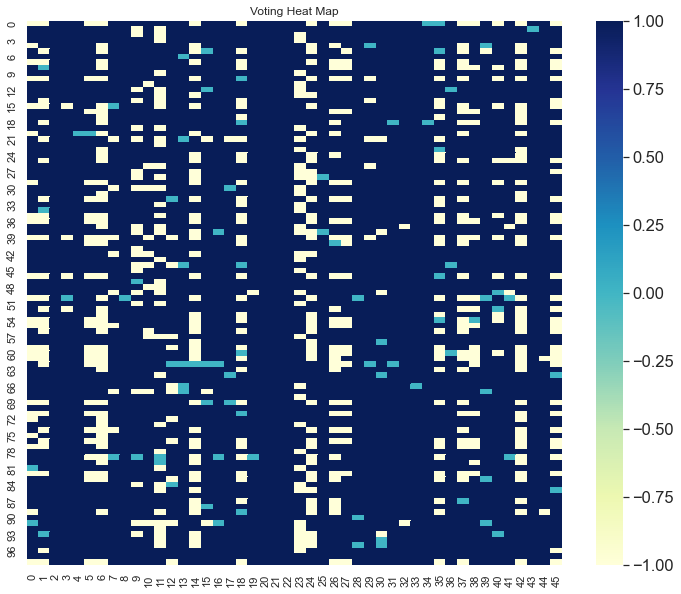

In [4]:
# heat map sorted by name, Nominative determinism?    
d = []
S = []
for sen in sorted(votdict):
    d.append(votdict[sen])
    S.append(sen)
D = np.array(d)
plot_heat_map(D)

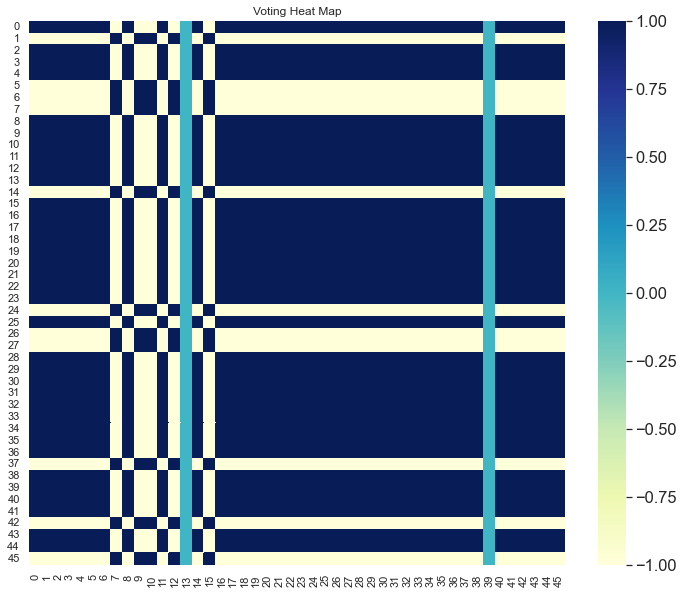

In [5]:
a = Matrix([votdict['Obama']])
b = Matrix([votdict['McCain']])
U = a.T * b # USSCP or Uncorrected Sums of Squares and Cross Products Matrix
d = np.array(U, float)
seaborn.set(color_codes=True)
plt.figure(1, figsize=(12, 10))
plt.title('Voting Heat Map')
seaborn.set(font_scale=1.5)
ax = seaborn.heatmap(d, cmap="YlGnBu")
plt.show()

In [6]:
U.trace(), sum(a)

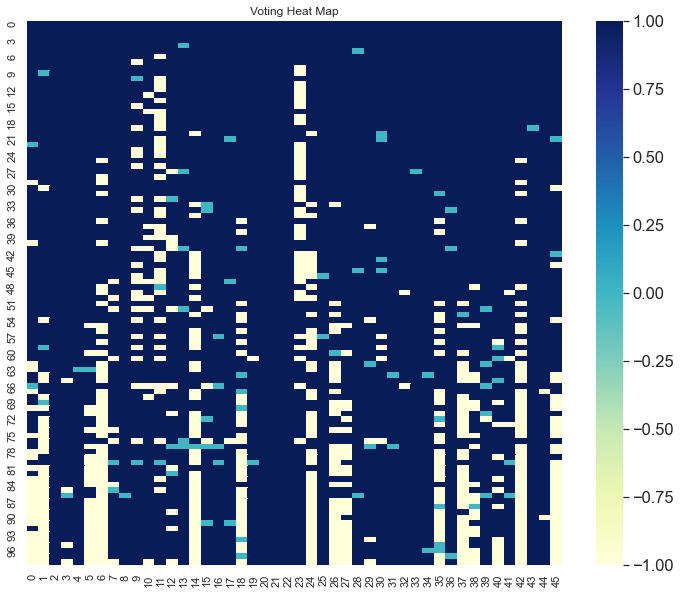

In [7]:
toad_dict = {s:voting_toadiness(s, votdict) for s in votdict}
sorted_toad_list = sorted(toad_dict.items(), key= lambda x:x[1], reverse=True)
  
d = []
S = []
for r in sorted_toad_list:
    sen = r[0]
    d.append(votdict[sen])
    S.append(sen)
D = np.array(d)
plot_heat_map(D)

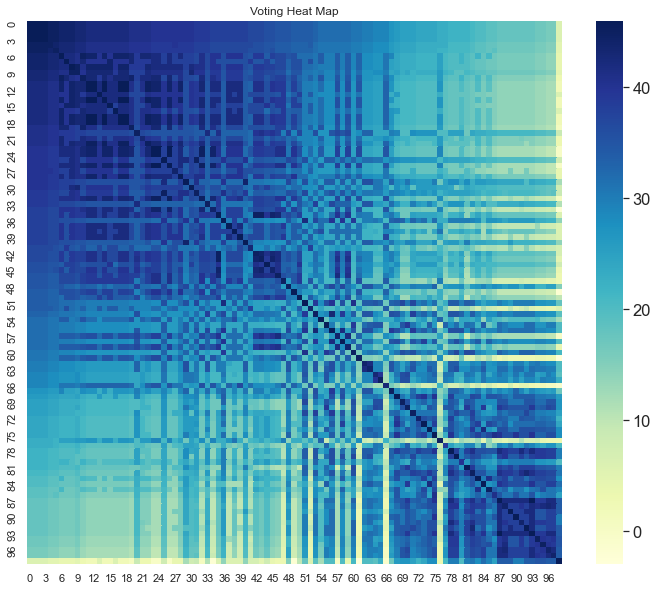

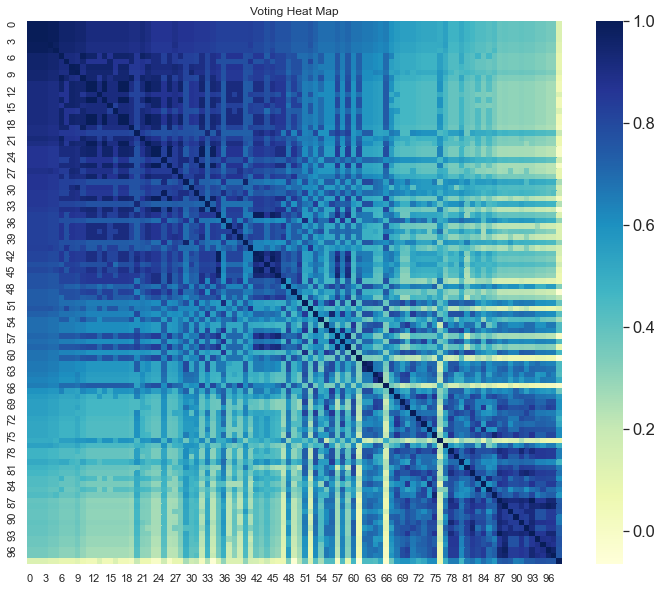

In [8]:
# now for something different...
# build a matrix of policy comparisons
p = np.zeros((len(votdict),len(votdict)))
n = 0
sen_map = {}
toads = [r[0] for r in sorted_toad_list]


for sen in toads:
    sen_map[sen] = n
    n = n+1
    
for sena in toads:
    for senb in votdict:
        p[sen_map[sena]][sen_map[senb]] = policy_compare(sena,senb,votdict)
#        print(sena, senb,policy_compare(sena,senb,votdict))

pp = np.zeros((len(votdict),len(votdict)))    
for sena in toads:
    for senb in votdict:
        pp[sen_map[sena]][sen_map[senb]] = cosine_simularity(sena,senb,votdict)  # normalize that data

plot_heat_map(p)
plot_heat_map(pp)

In [9]:
cosine_simularity('Byrd', 'Obama', votdict)

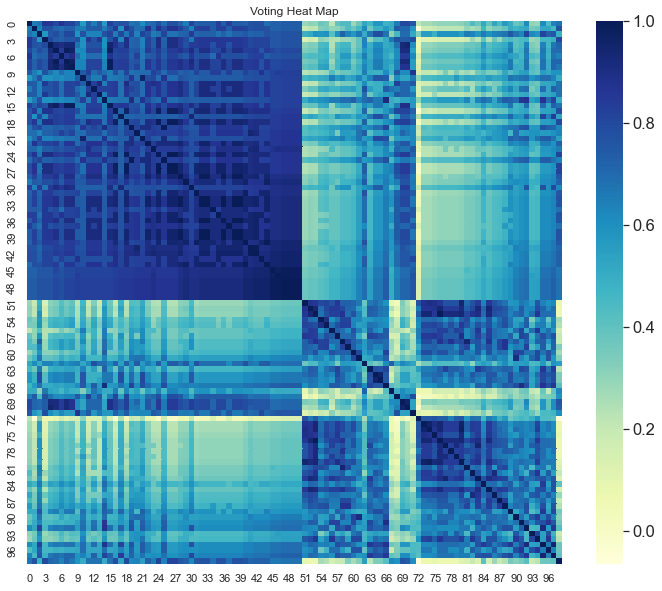

In [10]:
import functools

def comp(a,b):
    r = cosine_simularity(a,b, votdict) 
    if r > 0.5:
        return -1
    elif r < 0.5:
        return 1
    else:
        return 0
    

    
cosine_sorted = sorted(toads, key=functools.cmp_to_key(comp))

p = np.zeros((len(votdict),len(votdict)))

n = 0
sen_map = {}
for sen in cosine_sorted:
    sen_map[sen] = n
    n = n+1

for sena in cosine_sorted:
    for senb in cosine_sorted:
        p[sen_map[sena]][sen_map[senb]] = cosine_simularity(sena,senb,votdict)
plot_heat_map(p)

array([ 6, 42, 14, 24, 23, 11, 18, 37, 35, 45, 26,  1,  0,  5, 27,  9, 38,
       40, 12, 10,  7, 29, 30, 15,  3, 41, 39, 13, 17, 16, 44, 32, 28, 19,
       36, 25, 31, 34,  4, 33,  8, 43, 21, 20,  2, 22])

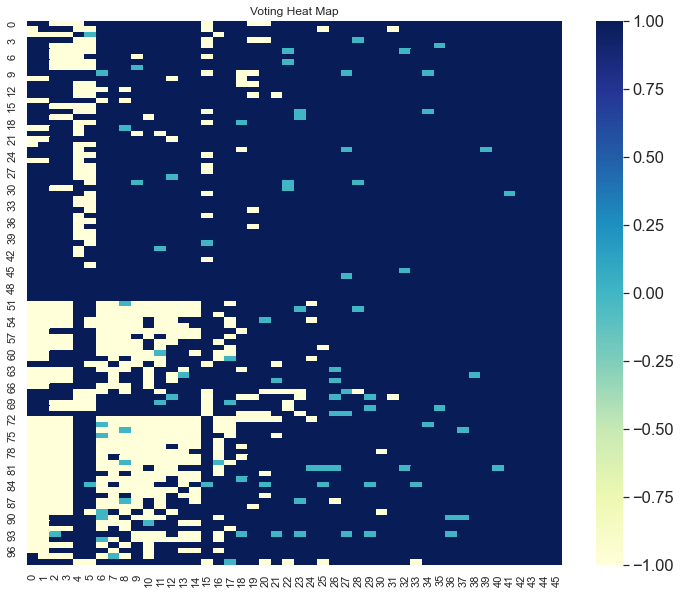

In [58]:
def map_sorted_bills(sen, votdict):
    sorted_index = index_sort_bills(votdict)
    votes = []
    r = votdict[sen]
    for i in sorted_index:
        votes.append(r[i])
    return votes
 

#print(map_sorted_bills('McCain', votdict))
#print(votdict['McCain'])

d = []
S = []
for r in cosine_sorted:
    sen = r
#    d.append(votdict[sen])
    d.append(map_sorted_bills(sen, votdict))
    S.append(sen)
D = np.array(d)
plot_heat_map(D)


### Compare sorting methods
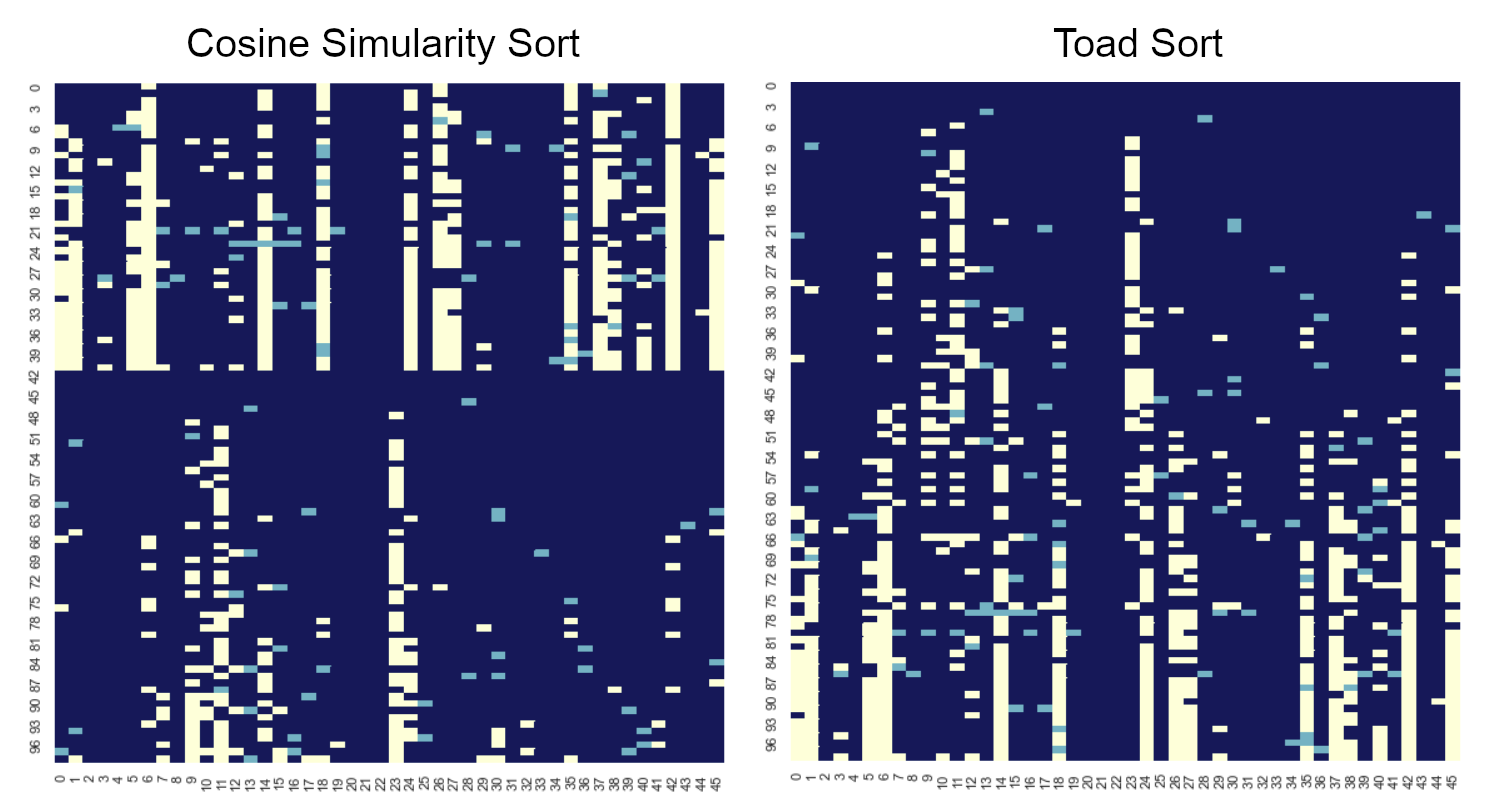

### Other things to try...

#### 1) Shannon’s entropy
H = -Sum[ P(xi) * log2( P(xi)) ]

#### 2) Naive Bayes clustering
   see: https://mc-stan.org/docs/2_22/stan-users-guide/naive-bayes-classification-and-clustering.html

#### 3) k-nearest neighbor

##### Consider using 'R' for statistical model

In [ ]:
display(Latex('k-Nearest Neighbors'))

X = np.random.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s=100);
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)
nearest = np.argsort(dist_sq, axis=1)
print(X)
print(nearest)

K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [ ]:
# get xml data